# Machine Learning using KNN and K Means Clustering to predict and classify users based on the IOT data.

### In this Jupyter notebook:
* we read the raw IoT data named final-bat1.csv from data folder (this file is created by new_ds_generator2.ipynb)
* we do data mining, cleaning, and aggregation to create a new dataframe for our Machine Learning Model.
* we used K-Nearest-Neighbour (KNN) model to train and predict the user's class based on his device usage behviour
* we used K-Means-Clustering (KMC) unsupervised learning algorithm to group the users based on their usage behaviour
For both the KNN and KMC models we used the elbow method to find the optimum value of K from elbow point.
Please note that the same code is used for three different battery types and the results are presented in the report.

In [1]:
import random
from random import randrange
import configparser
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import json
import csv
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style('whitegrid')
sns.set_style("whitegrid", {'axes.grid' : False})
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

In [3]:
def load_config (bat_no=0):
    '''
    @param bat_no: Number of battery type that we have dataset (csv file) for each
    @return: list of dataframes of each battery type charging and discharging
    @return: number of batteries
    This function will load all three battery datasets and return a list of dataframe including them
    '''
    print('loading the config file')
    config = configparser.ConfigParser()
    config_fileName = ('config.ini')
    config.read(config_fileName)
    datafolder_ge =config['DATASET']['DATA_FOLDER_GE']
    if  bat_no == 0 :
        bat_no =config['SETTING']['BATTARY_NO']
        bat_no = int(bat_no)
    battery_df =[]

    for bt in range(bat_no):
        path = datafolder_ge +os.sep+'final-bat' + str(bt+1) + '.csv'
        print('\n***********************************************************************************************************')
        print('*************************** Print Info and Head of dataframe of battery type {}****************************'.format(str(bt+1)))
        print('Loading data from ' +path)
        battery_df.append( pd.read_csv(path))
    return bat_no, battery_df

def print_df_info(battery_df, bat_no=3):
    '''
    @param battery_df: list of available dataframes
    @param bat_no: Number of battery type that we have dataset (csv file) for each
    This function will print .info() of all dataframes
    
    '''
    if not battery_df:
        print ('No dataframe is loaded')
        return
    if (bat_no ==0) or (len(battery_df)==0):
        print('please properly specify No of the battery datasets')
        return
    for bt in range(bat_no):
        print('\n***********************************************************************************************************')
        print('*************************** Print Info and Head of dataframe of battery type {}****************************'.format(str(bt+1)))
        print(battery_df[bt].info())
    

def print_df_head(battery_df, bat_no=3, No=3):
    '''
    @param battery_df: list of available dataframes
    @param bat_no: Number of battery type that we have dataset (csv file) for each
    @param No: number of head records to print for each dataframe
    This function will print .head() of all dataframes
    
    '''
    if not battery_df:
        print ('No dataframe is loaded')
        return
    if (bat_no ==0) or (len(battery_df)==0):
        print('please properly specify No of the battery datasets')
        return
    for bt in range(bat_no):
        print('\n***********************************************************************************************************')
        print('*************************** Print Info and Head of dataframe of battery type {}****************************'.format(str(bt+1)))
        print(battery_df[bt].head(No))
            
def print_statistics(battery_df, bat_no=3):
    '''
    @param battery_df: list of available dataframes
    @param bat_no: Number of battery type that we have dataset (csv file) for each
    This function will print som statiscs of dataframes including MAX Cycles, Max Users, and Max records
    
    '''
    if not battery_df:
        print ('No dataframe is loaded')
        return
    if (bat_no ==0) or (len(battery_df)==0):
        print('please properly specify No of the battery datasets')
        return
    for bt in range(bat_no):
        print('*************************** Print Info and Head of dataframe of battery type {}****************************'.format(str(bt+1)))
        print ('battery type:\t {}, Max No of Cycles:\t {}'.format(str(bt+1),input_df_list[bt].Battery_Cycle_No.max()))
        print ('battery type:\t {}, Max No of users:\t {}'.format(str(bt+1), input_df_list[bt].u_id.unique().size))
        print('battery type:\t {}, Max No of records:\t {}'.format(str(bt+1),battery_df[bt].Battery_Type.value_counts()))

In [4]:
bat_no, input_df_list = load_config()

loading the config file

***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 1****************************
Loading data from data_ge\final-bat1.csv

***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 2****************************
Loading data from data_ge\final-bat2.csv

***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 3****************************
Loading data from data_ge\final-bat3.csv


In [5]:
print_df_info(battery_df=input_df_list,bat_no= bat_no)


***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 1****************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8627791 entries, 0 to 8627790
Data columns (total 11 columns):
Battery_Cycle_No    int64
Location            object
Battery_Status      int64
Battery_Level       int64
Battery_Type        object
u_id                int64
DateTime            object
full_name           object
Latitude            float64
Langitude           float64
User_Type           int64
dtypes: float64(2), int64(5), object(4)
memory usage: 724.1+ MB
None

***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 2****************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8487359 entries, 0 to 8487358
Data columns

In [6]:
print_df_head(battery_df=input_df_list,bat_no=bat_no, No=4)


***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 1****************************
   Battery_Cycle_No Location  Battery_Status  Battery_Level Battery_Type  \
0                 1      SFU               2             55         bat1   
1                 1      SFU               2             17         bat1   
2                 1      SFU               2             44         bat1   
3                 1     CDOT               2             29         bat1   

   u_id             DateTime   full_name   Latitude   Langitude  User_Type  
0  1507  01-01-2018 03:00:00  user001507  49.275361 -122.912560          1  
1  1509  01-01-2018 03:00:00  user001509  49.275361 -122.912560          3  
2  1510  01-01-2018 03:00:00  user001510  49.275361 -122.912560          1  
3  1512  01-01-2018 03:00:00  user001512  41.903507  -87.667165          3  

*****************

### let's check how many user we have in each battery dataset

In [7]:
print_statistics(input_df_list,bat_no)

*************************** Print Info and Head of dataframe of battery type 1****************************
battery type:	 1, Max No of Cycles:	 615
battery type:	 1, Max No of users:	 983
battery type:	 1, Max No of records:	 bat1    8627791
Name: Battery_Type, dtype: int64
*************************** Print Info and Head of dataframe of battery type 2****************************
battery type:	 2, Max No of Cycles:	 561
battery type:	 2, Max No of users:	 967
battery type:	 2, Max No of records:	 bat2    8487359
Name: Battery_Type, dtype: int64
*************************** Print Info and Head of dataframe of battery type 3****************************
battery type:	 3, Max No of Cycles:	 397
battery type:	 3, Max No of users:	 1050
battery type:	 3, Max No of records:	 bat3    9215850
Name: Battery_Type, dtype: int64


# EDA on each battery dataframe To analys UserType 

lets remove the bat from the battery type field to use it better

In [8]:
EDA_df = input_df_list
for bt in range(bat_no):
    EDA_df[bt]['Battery_Type']= EDA_df[bt]['Battery_Type'].apply(lambda x: x.strip('bat'))

In [9]:
print_df_head(EDA_df,bat_no,4)


***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 1****************************
   Battery_Cycle_No Location  Battery_Status  Battery_Level Battery_Type  \
0                 1      SFU               2             55            1   
1                 1      SFU               2             17            1   
2                 1      SFU               2             44            1   
3                 1     CDOT               2             29            1   

   u_id             DateTime   full_name   Latitude   Langitude  User_Type  
0  1507  01-01-2018 03:00:00  user001507  49.275361 -122.912560          1  
1  1509  01-01-2018 03:00:00  user001509  49.275361 -122.912560          3  
2  1510  01-01-2018 03:00:00  user001510  49.275361 -122.912560          1  
3  1512  01-01-2018 03:00:00  user001512  41.903507  -87.667165          3  

*****************

### lets change the categorical column Battery_status column to numerical using get_dummies

In [10]:
for bt in range(bat_no):
    EDA_df[bt] = pd.get_dummies(EDA_df[bt], columns=['Battery_Status'])

In [11]:
print_df_head(EDA_df,bat_no, 3)


***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 1****************************
   Battery_Cycle_No Location  Battery_Level Battery_Type  u_id  \
0                 1      SFU             55            1  1507   
1                 1      SFU             17            1  1509   
2                 1      SFU             44            1  1510   

              DateTime   full_name   Latitude  Langitude  User_Type  \
0  01-01-2018 03:00:00  user001507  49.275361 -122.91256          1   
1  01-01-2018 03:00:00  user001509  49.275361 -122.91256          3   
2  01-01-2018 03:00:00  user001510  49.275361 -122.91256          1   

   Battery_Status_1  Battery_Status_2  
0                 0                 1  
1                 0                 1  
2                 0                 1  

*************************************************************************

In [12]:
tt = []
for bt in range(bat_no):
    tt.append(pd.DataFrame())
    tt[bt]['charging_length'] = EDA_df[bt].groupby(['u_id','Battery_Cycle_No'])['Battery_Status_1'].sum()
    tt[bt]['discharging_length'] = EDA_df[bt].groupby(['u_id','Battery_Cycle_No'])['Battery_Status_2'].sum()
    tt[bt] = tt[bt].reset_index()

In [13]:
print_df_head(tt,bat_no, 3)


***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 1****************************
   u_id  Battery_Cycle_No  charging_length  discharging_length
0  1507                 1              2.0                  23
1  1507                 2              2.0                  52
2  1507                 3              2.0                  55

***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 2****************************
   u_id  Battery_Cycle_No  charging_length  discharging_length
0  1502                 1                1                   2
1  1502                 2                1                 118
2  1502                 3                1                 117

***************************************************************

### lets count number cycle of each user in each dataframe

In [14]:
n_cycles =[]
for bt in range(bat_no):
    n_cycles.append(pd.DataFrame())
    n_cycles[bt] = tt[bt].groupby('u_id').count()
    n_cycles[bt].reset_index(inplace = True)
    n_cycles[bt].drop(['charging_length','discharging_length'], axis = 1, inplace = True)
print_df_head(n_cycles)


***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 1****************************
   u_id  Battery_Cycle_No
0  1507               252
1  1509               408
2  1510               246

***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 2****************************
   u_id  Battery_Cycle_No
0  1502               108
1  1503               330
2  1513               321

***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 3****************************
   u_id  Battery_Cycle_No
0  1501               368
1  1504               368
2  1505               264


### lets sum charge rate for each user in each dataframe

In [15]:
charge_time =[]
for bt in range(bat_no):
    charge_time.append(pd.DataFrame())
    charge_time[bt] = tt[bt].groupby('u_id').sum()
    charge_time[bt].reset_index(inplace = True)
    charge_time[bt].drop(['discharging_length','Battery_Cycle_No'], axis = 1, inplace = True)
print_df_head(charge_time)


***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 1****************************
   u_id  charging_length
0  1507            716.0
1  1509           6212.0
2  1510            708.0

***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 2****************************
   u_id  charging_length
0  1502            134.0
1  1503            878.0
2  1513            847.0

***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 3****************************
   u_id  charging_length
0  1501           4880.0
1  1504           4890.0
2  1505           1693.0


### lets sum discharge rate for each user in each dataframe

In [16]:
discharge_time =[]
for bt in range(bat_no):
    discharge_time.append(pd.DataFrame())
    discharge_time[bt] = tt[bt].groupby('u_id').sum()
    discharge_time[bt].reset_index(inplace = True)
    discharge_time[bt].drop(['charging_length','Battery_Cycle_No'], axis = 1, inplace = True)
print_df_head(discharge_time)


***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 1****************************
   u_id  discharging_length
0  1507              8061.0
1  1509              2565.0
2  1510              8069.0

***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 2****************************
   u_id  discharging_length
0  1502              8643.0
1  1503              7899.0
2  1513              7930.0

***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 3****************************
   u_id  discharging_length
0  1501              3897.0
1  1504              3887.0
2  1505              7084.0


### let's add merge all three above created dataframes 

In [17]:
ml_data =[]
for bt in range(bat_no):
    ml_data.append(pd.DataFrame())
    ml_data[bt] = pd.merge(n_cycles[bt], charge_time[bt], how = 'inner', on = 'u_id')
    ml_data[bt] = pd.merge(ml_data[bt], discharge_time[bt], how = 'inner', on = 'u_id')
print_df_head(ml_data)


***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 1****************************
   u_id  Battery_Cycle_No  charging_length  discharging_length
0  1507               252            716.0              8061.0
1  1509               408           6212.0              2565.0
2  1510               246            708.0              8069.0

***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 2****************************
   u_id  Battery_Cycle_No  charging_length  discharging_length
0  1502               108            134.0              8643.0
1  1503               330            878.0              7899.0
2  1513               321            847.0              7930.0

***************************************************************

In [18]:
user_types = []
for bt in range(bat_no):
    user_types.append(pd.DataFrame())
    user_types[bt] = EDA_df[bt][['u_id','User_Type']].drop_duplicates()

In [19]:
print_df_head(user_types)


***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 1****************************
   u_id  User_Type
0  1507          1
1  1509          3
2  1510          1

***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 2****************************
   u_id  User_Type
0  1502          1
1  1503          2
2  1513          2

***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 3****************************
   u_id  User_Type
0  1501          2
1  1504          2
2  1505          1


### Let's merge previous df with usertype 

In [20]:
for bt in range(bat_no):
    ml_data[bt] = pd.merge(ml_data[bt], user_types[bt], on = 'u_id', how = 'inner')
    ml_data[bt]['u_type'] = ml_data[bt].User_Type.astype(int)
    ml_data[bt] = ml_data[bt].drop(columns='User_Type')
print_df_head(ml_data)


***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 1****************************
   u_id  Battery_Cycle_No  charging_length  discharging_length  u_type
0  1507               252            716.0              8061.0       1
1  1509               408           6212.0              2565.0       3
2  1510               246            708.0              8069.0       1

***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 2****************************
   u_id  Battery_Cycle_No  charging_length  discharging_length  u_type
0  1502               108            134.0              8643.0       1
1  1503               330            878.0              7899.0       2
2  1513               321            847.0              7930.0       2


## Lets save the ML data

In [21]:
def check_folder(folder_name):
    if not os.path.exists(folder_name):
        print('Making the {} folder to save the model'.format(folder_name))
        os.makedirs(folder_name)
    else:
        print('Folder {} exists'.format(folder_name))
    
print('loading the config file')
config = configparser.ConfigParser()
config_fileName = ('config.ini')
config.read(config_fileName)
datafolder_model =config['MODEL']['MODEL_FOLDER']
datafolder_ge = config['DATASET']['DATA_FOLDER_GE']
plotsfolder = config['PLOTS']['PLOT_FOLDER']

check_folder(datafolder_model)
check_folder(datafolder_ge)
check_folder(plotsfolder)


loading the config file
Folder models exists
Folder data_ge exists
Folder plots exists


In [22]:
for bt in range(bat_no):    
    filename = '{}{}ML_UserType_data_Bat{}.csv'.format(datafolder_ge, os.sep , str(bt+1))
    ml_data[bt].to_csv(filename,index=False)
    print('file {} saved'.format(filename))

file data_ge\ML_UserType_data_Bat1.csv saved
file data_ge\ML_UserType_data_Bat2.csv saved
file data_ge\ML_UserType_data_Bat3.csv saved


## So, our data is ready for ML training!

Creating X and y dataframes form model training for each battery types

In [23]:
X =[]
y=[]
X_train = []
X_test = []
y_train = []
y_test = []
for bt in range(bat_no):
    X.append(pd.DataFrame())
    y.append(pd.DataFrame())
    X_train.append(pd.DataFrame())
    X_test.append(pd.DataFrame())
    y_train.append(pd.DataFrame())
    y_test.append(pd.DataFrame())
    X[bt] = ml_data[bt].drop(['u_id','u_type'],axis=1)
    y[bt] = ml_data[bt]['u_type']
    X_train[bt], X_test[bt], y_train[bt], y_test[bt] = train_test_split(X[bt], y[bt], test_size=0.30, random_state=42)


In [24]:
print_df_head(X_train,3,3)


***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 1****************************
     Battery_Cycle_No  charging_length  discharging_length
926               248            702.0              8075.0
522               503           3203.0              5574.0
786               612           5663.0              3114.0

***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 2****************************
     Battery_Cycle_No  charging_length  discharging_length
423               110            129.0              8648.0
730               560           4138.0              4639.0
228               108            136.0              8641.0

***********************************************************************************************

In [25]:
print_df_head(y_train)


***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 1****************************
926    1
522    2
786    3
Name: u_type, dtype: int32

***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 2****************************
423    1
730    3
228    1
Name: u_type, dtype: int32

***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 3****************************
281    3
266    3
534    1
Name: u_type, dtype: int32


In [26]:
print_df_head(X_test)


***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 1****************************
     Battery_Cycle_No  charging_length  discharging_length
810               604           5684.0              3093.0
801               612           5666.0              3111.0
813               239            680.0              8097.0

***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 2****************************
     Battery_Cycle_No  charging_length  discharging_length
244               555           4069.0              4708.0
467               110            131.0              8646.0
836               316            822.0              7955.0

***********************************************************************************************

In [27]:
print_df_head(y_test)


***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 1****************************
810    3
801    3
813    1
Name: u_type, dtype: int32

***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 2****************************
244    3
467    1
836    2
Name: u_type, dtype: int32

***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 3****************************
352    2
689    2
485    3
Name: u_type, dtype: int32


### it seems we are ready for training our models

since there is User Type as labele for y value. So, we will use the supervised learning method of KNeighborsClassifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.externals import joblib


# Training The KNeighborsClassifier 
* fit a model for each dattery dataset 
* save the fitted model
* calculate the Confusion Matrix 
* generate classification report
We can pass n_neighbors=3, however passing 1, we assume we dpn't know the clusters in our data

## Train Models and Save them

In [29]:
def train_save_models(X_train,y_train,bat_no, nn,datafolder_model):
    knn = []
    for bt in range(bat_no):
        knn.append(KNeighborsClassifier(n_neighbors=nn) )
        #Train the model
        knn[bt].fit(X_train[bt], y_train[bt])
        print('\n***************************************************************************************************************************')
        print('*************************** save the model  of dataframe of battery type {} to disk****************************'.format(str(bt+1)))
        # save the model to disk
        filename = datafolder_model +'{}user{}_model.sav'.format(os.sep,str(bt+1))
        joblib.dump(knn[bt], filename) 
        
# We can pass n_neighbors=3, however passing 1, we assume we dpn't know the clusters in our data
train_save_models(X_train,y_train,bat_no, 3,datafolder_model)


***************************************************************************************************************************
*************************** save the model  of dataframe of battery type 1 to disk****************************

***************************************************************************************************************************
*************************** save the model  of dataframe of battery type 2 to disk****************************

***************************************************************************************************************************
*************************** save the model  of dataframe of battery type 3 to disk****************************


## Load Models and use them

In [30]:
def load_eval_model(X_test,y_test,bat_no,datafolder_model):
    #Load and evaluate the models
    knn = []
    predictions =[]
    for bt in range(bat_no):
        filename = datafolder_model +'{}user{}_model.sav'.format(os.sep,str(bt+1))
        knn.append(joblib.load(filename) )
        #Train the model
        predictions.append(knn[bt].predict(X_test[bt]))
        print('\n***************************************************************************************************************************')
        print('*************************** Print Confusion Matrix and report of dataframe of battery type {}****************************'.format(str(bt+1)))
        print(confusion_matrix(y_test[bt], predictions[bt]))
        print(classification_report(y_test[bt],predictions[bt]))

load_eval_model(X_test,y_test,bat_no,datafolder_model) 


***************************************************************************************************************************
*************************** Print Confusion Matrix and report of dataframe of battery type 1****************************
[[80  7  2]
 [ 6 99  5]
 [ 0  4 92]]
              precision    recall  f1-score   support

           1       0.93      0.90      0.91        89
           2       0.90      0.90      0.90       110
           3       0.93      0.96      0.94        96

   micro avg       0.92      0.92      0.92       295
   macro avg       0.92      0.92      0.92       295
weighted avg       0.92      0.92      0.92       295


***************************************************************************************************************************
*************************** Print Confusion Matrix and report of dataframe of battery type 2****************************
[[ 90   1   0]
 [  0  97   3]
 [  0   0 100]]
              precision    recall  f1-score 

**The above results are from n_neighbors = 3 (k = 3). They look fine. Usually, we use elbow method to find the best value for K to improved performance, however, it is not required here.**</font>

## KMeans Clustering -- Unsupervised learning model
**Let's start with elbow plot to find the optimim value of k.**

In [33]:
from sklearn.cluster import KMeans

In [34]:
# start and the end value to check for K 
start_k = 1
end_k = 10
sum_square =[]
for bt in range(bat_no):
    # sum_square will be key,value pair for the elbow plot!
    sum_square.append({})
    # Let's test for K from 1 to 10, we can use range() function here! remember?
    for k in range(start_k, end_k):
        kmeans = KMeans(n_clusters=k).fit(ml_data[bt].drop(['u_type','u_id'],axis=1))
        # .inertia: Computing Sum of Squared Distances of samples to their closest cluster center.
        sum_square[bt][k] = kmeans.inertia_ 

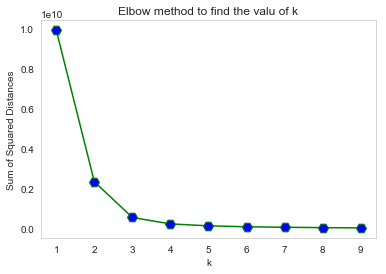

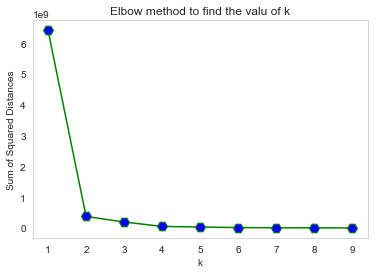

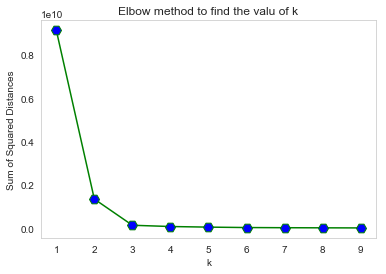

In [35]:
for bt in range(bat_no):
    plt.plot(list(sum_square[bt].keys()), list(sum_square[bt].values()),
             linestyle ='-', marker = 'H', color = 'g',
             markersize = 10,markerfacecolor = 'b')
    plt.xlabel('k')
    plt.ylabel('Sum of Squared Distances')
    plt.title('Elbow method to find the valu of k')
    plt.savefig('{}{}kmeans_clustering_elbow_userType{}.png'.format(plotsfolder,os.sep,str(bt+1)))
    plt.show()

### From the above plots, it is expected to have 3 (K = 3) clusters in out data using elbow method. Let's work with `n_clusters = 3`.

In [36]:
kmeans = []
centers = []
for bt in range(bat_no):
    # Creating kmens instance with thee number of clusters as predected from the elbow chart given above.
    kmeans.append( KMeans(n_clusters=3))
    # Fitting the model to our dataset
    kmeans[bt].fit(ml_data[bt].drop(['u_id','u_type'], axis=1))
    # Cluster centeriods
    centers.append(kmeans[bt].cluster_centers_)
    print ('bat{} - users centers are:'.format( str(bt+1)))
    print (centers[bt])

bat1 - users centers are:
[[ 491.52884615 6065.92067308 2711.07932692]
 [ 245.16541353  738.72932331 8038.27067669]
 [ 453.58471761 3397.81727575 5379.18272425]]
bat2 - users centers are:
[[ 540.52366864 4214.63313609 4562.36686391]
 [ 322.29503106  879.09627329 7897.90372671]
 [ 108.92833876  133.45928339 8643.54071661]]
bat3 - users centers are:
[[ 266.40797546 1785.67177914 6991.32822086]
 [ 365.15710723 6769.09725686 2007.90274314]
 [ 351.625387   4914.85139319 3862.14860681]]


**We are fortunate to know the target values, plots will help to compare.**

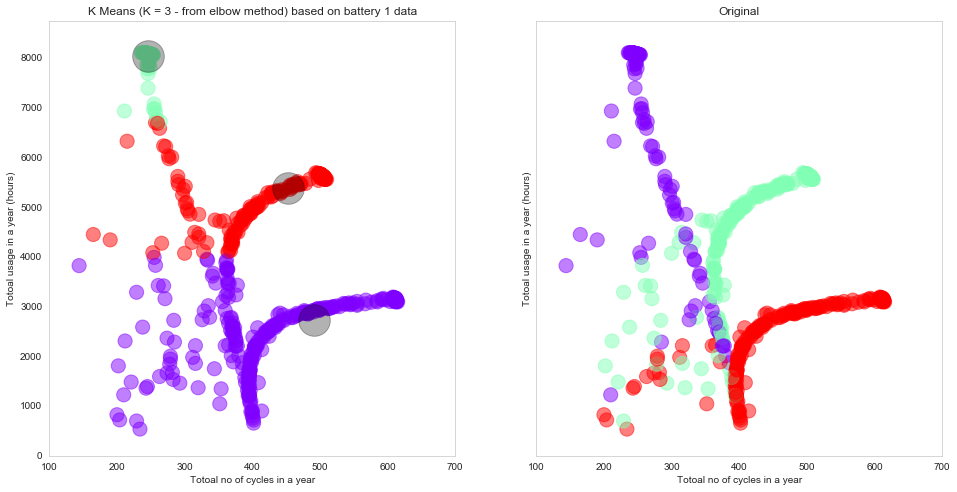

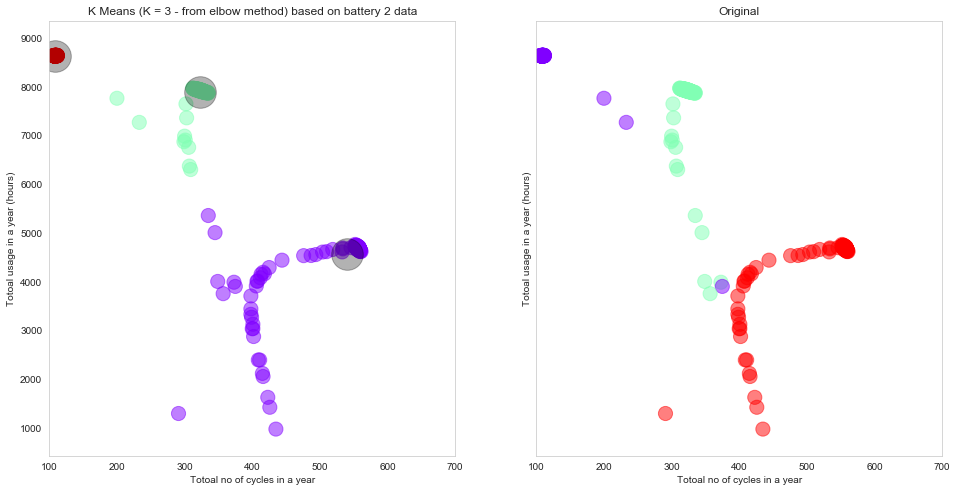

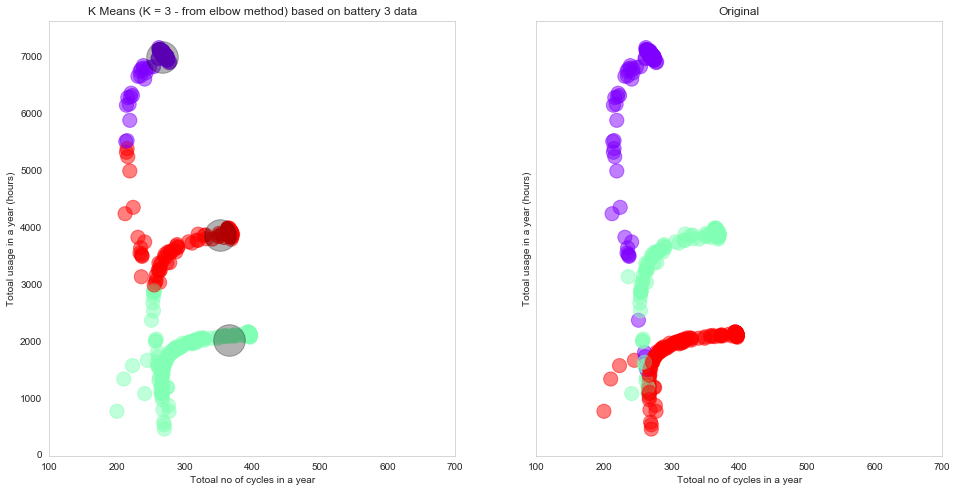

In [38]:
for bt in range(bat_no):
    f, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2,sharey=True,figsize = (16,8))

    # For fitted with kmeans 
    ax1.set_title('K Means (K = 3 - from elbow method) based on battery {} data'.format(str(bt+1)))

    ax1.scatter(ml_data[bt].Battery_Cycle_No,ml_data[bt].discharging_length, 
                c = kmeans[bt].labels_, cmap='rainbow', s = 200, alpha=0.5)
    ax1.set_ylabel('Totoal usage in a year (hours)')
    ax1.set_xlabel('Totoal no of cycles in a year')
    ax1.set_xlim(100, 700)
    # ax1.scatter(x=centers[:, 0], y=centers[:, 5],
    #             c='black',s=300, alpha=0.5);

    ax1.scatter(x=centers[bt][:, 0], y=centers[bt][:, 2],c='black',s=1000, alpha=0.3);

    # # For original data 
    ax2.set_title("Original")
    ax2.scatter(ml_data[bt].Battery_Cycle_No,ml_data[bt].discharging_length, 
                c = ml_data[bt].u_type, cmap='rainbow', s = 200, alpha=0.5)
    ax2.set_ylabel('Totoal usage in a year (hours)')
    ax2.set_xlabel('Totoal no of cycles in a year')
    ax2.set_xlim(100, 700)
    f.savefig('{}{}kmeans_clusters_ml_userType{}.png'.format(plotsfolder,os.sep,str(bt+1)))


## Thank you!